In [1]:
import numpy as np
import pandas as pd

# Preprocessing

In [2]:
# read in csv file
df = pd.read_csv("assignment5s_mushroom_dataset.csv")

In [3]:
# get info
print("shape: ", df.shape, '\n')

print("columns: ", df.columns, '\n')

display(df.head())

shape:  (8124, 23) 

columns:  Index(['class', 'cap-shape', 'cap-surface', 'cap-color', 'bruises', 'odor',
       'gill-attachment', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-shape', 'stalk-root', 'stalk-surface-above-ring',
       'stalk-surface-below-ring', 'stalk-color-above-ring',
       'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number',
       'ring-type', 'spore-print-color', 'population', 'habitat    '],
      dtype='object') 



,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [4]:
print(df.dtypes)

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object


In [5]:
# check for empty cells
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [6]:
# one-hot-encode nominal data
df = pd.get_dummies(df, drop_first=True)

In [7]:
df.head()

,class_p,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,...,population_n,population_s,population_v,population_y,habitat _g,habitat _l,habitat _m,habitat _p,habitat _u,habitat _w
0,1,0,0,0,0,1,0,1,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,0,1,0,1,0,0,...,1,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,1,0,0,0
3,1,0,0,0,0,1,0,0,1,0,...,0,1,0,0,0,0,0,0,1,0
4,0,0,0,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


In [8]:
# get predictors and independent variable
X = df.iloc[:,1:].values
y = df.iloc[:,0].values

# Problem #1

In [9]:
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [10]:
# 10-fold cross-validation for classifier
def eval_classifier(_clf, _X, _y):
    acc = []
    kf = StratifiedKFold(n_splits=10, shuffle=False)
    for train_index, test_index in kf.split(_X, _y):
        _clf.fit(_X[train_index], _y[train_index])
        y_pred = _clf.predict(_X[test_index])
        acc.append(accuracy_score(_y[test_index], y_pred))
    
    return np.array(acc)

In [11]:
# GaussianNB
acc = eval_classifier(GaussianNB(), X, y)
print(f'GaussianNB 10-Fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

GaussianNB 10-Fold Accuracy: 0.888 ± 0.082


In [12]:
# LinearSVC
acc = eval_classifier(SVC(kernel='linear', probability=True), X, y)
print(f'LinearSVC 10-Fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

LinearSVC 10-Fold Accuracy: 0.967 ± 0.094


In [13]:
# MLPClassifier
acc = eval_classifier(MLPClassifier(), X, y)
print(f'MLPClassifier 10-Fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

MLPClassifier 10-Fold Accuracy: 0.962 ± 0.094


In [14]:
# Decision Tree Classifier
acc = eval_classifier(DecisionTreeClassifier(), X, y)
print(f'Decision Tree 10-Fold Accuracy: {np.mean(acc)} {chr(177)} {np.std(acc):.3f}')

Decision Tree 10-Fold Accuracy: 0.9685116851168513 ± 0.094


In [15]:
# Random Forest
acc = eval_classifier(RandomForestClassifier(), X, y)
print(f'Random Forest 10-Fold Accuracy: {np.mean(acc)} {chr(177)} {np.std(acc):.3f}')

Random Forest 10-Fold Accuracy: 0.9660486309296591 ± 0.094


# Problem #2

In [16]:
# generate 100 ensembles for each classifier
def generate_100(_clf1, _clf2, _clf3, _clf4):
    GaussianNB = []
    LinearSVC = []
    MLPClassifier = []
    DecisionTree = []
    
    # generate GaussianNB
    for i in range(100):
        GaussianNB.append(_clf1)
        LinearSVC.append(_clf2)
        MLPClassifier.append(_clf3)
        DecisionTree.append(_clf4)
    
    return GaussianNB, LinearSVC, MLPClassifier, DecisionTree

In [17]:
# returns ensemble lists of their respective individual classifiers
GaussianNB_Ensemble, LinearSVC_Ensemble, MLPClassifier_Ensemble, DecisionTree_Ensemble = generate_100(GaussianNB(),
                                                                                                      SVC(kernel='linear', probability=True),
                                                                                                      MLPClassifier(hidden_layer_sizes=(3,3), max_iter=30, tol=1*10**-1),
                                                                                                      DecisionTreeClassifier(max_depth=5, max_features=5)
                                                                                                      )

# Problem #3

In [18]:
from random import sample
from sklearn.model_selection import train_test_split

In [19]:
def ensemble_fit(_ensemble, _X, _y, _subset_size):
    for i in range(len(_ensemble)):
        # get data subset
        subset_indices = sample(range(len(_X)), int(len(_X) * _subset_size))
        X_subset = _X[subset_indices]
        y_subset = _y[subset_indices]
        
        # train on subset
        _ensemble[i] = _ensemble[i].fit(X_subset, y_subset)

# Problem #4

In [20]:
def ensemble_predict(_ensemble, _X, _y):
    y_pred_counts = [0,0]
    
    # predict for each classifier in ensemble
    for i in len(_ensemble):
        y_pred = np.argmax(_ensemble[i].predict_proba(_X))
        
        y_pred_counts[y_pred] += 1
    
    # return argmax of prediction counts
    return np.argmax(y_pred_counts)

# Problem #5

In [21]:
def ensemble_CV(_ensemble, _X, _y, _subset_size):
    
    acc = []
    
    # iterate for each classifier in ensemble
    for i in range(len(_ensemble)):
        # get data subset
        subset_indices = sample(range(len(_X)), int(len(_X) * _subset_size))
        X_subset = _X[subset_indices]
        y_subset = _y[subset_indices]
        
        clf_acc = []
        
        # if subsample ratio results in subset length < 10, return 0 accuracy
        if len(X_subset) < 10:
            return [0]
        
        # 10-fold CV train on subset
        else:
            kf = StratifiedKFold(n_splits=10, shuffle=False)
            for train_index, test_index in kf.split(X_subset, y_subset):
                _ensemble[i].fit(X_subset[train_index], y_subset[train_index])
                y_pred = _ensemble[i].predict(X_subset[test_index])
                clf_acc.append(accuracy_score(y_subset[test_index], y_pred))
        
        # get average accuracy of individual classifier
        acc.append(np.mean(clf_acc))
    
    
    # return list of classifiers' accuracy
    return acc

## Subsample ratio = 0.1

In [22]:
# GaussianNB Ensemble
acc = ensemble_CV(GaussianNB_Ensemble, X, y, 0.1)
print(f'GaussianNB Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

GaussianNB Ensemble 10-fold Accuracy: 0.864 ± 0.069


In [23]:
# LinearSVC Ensemble
acc = ensemble_CV(LinearSVC_Ensemble, X, y, 0.1)
print(f'LinearSVC Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

LinearSVC Ensemble 10-fold Accuracy: 0.998 ± 0.002


In [24]:
# MLPClassifier Ensemble
acc = ensemble_CV(MLPClassifier_Ensemble, X, y, 0.1)
print(f'MLPClassifier Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

MLPClassifier Ensemble 10-fold Accuracy: 0.594 ± 0.039


In [25]:
# DecisionTree Ensemble
acc = ensemble_CV(DecisionTree_Ensemble, X, y, 0.1)
print(f'DecisionTree Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

DecisionTree Ensemble 10-fold Accuracy: 0.891 ± 0.021


In [26]:
# Regular Decision Tree
acc = []

# get data subset
subset_indices = sample(range(len(X)), int(len(X) * 0.1))
X_subset = X[subset_indices]
y_subset = y[subset_indices]

tree = DecisionTreeClassifier(max_depth=5, max_features=5)
kf = StratifiedKFold(n_splits=10, shuffle=False)
for train_index, test_index in kf.split(X_subset, y_subset):
    tree.fit(X_subset[train_index], y_subset[train_index])
    y_pred = tree.predict(X_subset[test_index])
    acc.append(accuracy_score(y_subset[test_index], y_pred))

print(f'Regular DecisionTree 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

Regular DecisionTree 10-fold Accuracy: 0.915 ± 0.042


## Subsample ratio = 0.001

In [27]:
import warnings
warnings.filterwarnings('ignore')

In [28]:
# GaussianNB Ensemble
acc = ensemble_CV(GaussianNB_Ensemble, X, y, 0.001)
print(f'GaussianNB Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

GaussianNB Ensemble 10-fold Accuracy: 0.000 ± 0.000


In [29]:
# LinearSVC Ensemble
acc = ensemble_CV(LinearSVC_Ensemble, X, y, 0.001)
print(f'LinearSVC Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

LinearSVC Ensemble 10-fold Accuracy: 0.000 ± 0.000


In [30]:
# MLPClassifier Ensemble
acc = ensemble_CV(MLPClassifier_Ensemble, X, y, 0.001)
print(f'MLPClassifier Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

MLPClassifier Ensemble 10-fold Accuracy: 0.000 ± 0.000


In [31]:
# DecisionTree Ensemble
acc = ensemble_CV(DecisionTree_Ensemble, X, y, 0.001)
print(f'DecisionTree Ensemble 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

DecisionTree Ensemble 10-fold Accuracy: 0.000 ± 0.000


In [33]:
# Regular Decision Tree
acc = []

# get data subset
subset_indices = sample(range(len(X)), int(len(X) * 0.001))
X_subset = X[subset_indices]
y_subset = y[subset_indices]

tree = DecisionTreeClassifier(max_depth=5, max_features=5)
kf = StratifiedKFold(n_splits=len(X_subset)-3, shuffle=False)
for train_index, test_index in kf.split(X_subset, y_subset):
    tree.fit(X_subset[train_index], y_subset[train_index])
    y_pred = tree.predict(X_subset[test_index])
    acc.append(accuracy_score(y_subset[test_index], y_pred))

print(f'Regular DecisionTree 10-fold Accuracy: {np.mean(acc):.3f} {chr(177)} {np.std(acc):.3f}')

Regular DecisionTree 10-fold Accuracy: 0.400 ± 0.374


# Problem #6

In [34]:
import matplotlib.pyplot as plt

In [35]:
Gaussian_Acc = []
LinearSVC_Acc = []
MLPClassifier_Acc = []
DecisionTree_Acc = []

ratios = [0.0005, 0.001, 0.005, 0.01, 0.03, 0.05, 0.1]

In [36]:
# GaussianNB Ensemble
for ratio in ratios:
    acc = ensemble_CV(GaussianNB_Ensemble, X, y, ratio)
    Gaussian_Acc.append(np.mean(acc))

In [37]:
# LinearSVC Ensemble
for ratio in ratios:
    acc = ensemble_CV(LinearSVC_Ensemble, X, y, ratio)
    LinearSVC_Acc.append(np.mean(acc))

In [38]:
# MLPClassifier Ensemble
for ratio in ratios:
    acc = ensemble_CV(MLPClassifier_Ensemble, X, y, ratio)
    MLPClassifier_Acc.append(np.mean(acc))

In [39]:
# Decision Tree Ensemble
for ratio in ratios:
    acc = ensemble_CV(DecisionTree_Ensemble, X, y, ratio)
    DecisionTree_Acc.append(np.mean(acc))

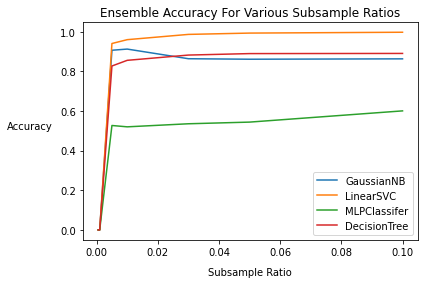

In [40]:
plt.plot(ratios, Gaussian_Acc, label='GaussianNB')
plt.plot(ratios, LinearSVC_Acc, label='LinearSVC')
plt.plot(ratios, MLPClassifier_Acc, label='MLPClassifer')
plt.plot(ratios, DecisionTree_Acc, label='DecisionTree')

plt.legend()
plt.title('Ensemble Accuracy For Various Subsample Ratios')

plt.xlabel('Subsample Ratio', labelpad=10)
plt.ylabel('Accuracy', rotation='horizontal', labelpad=30)

plt.show()

Above we observe that the overall trend for all ensembles is that with an increase in subsample ratio, the accuracy increases. This is expected as more samples from the training data in this case will allow the ensemble to learn better.

The lowest performing of the bunch as the MLPClassifier neural network.

It is notable to point out that for GaussianNB, performance gradually decreased after a peak with the increase of the subsample ratios.